In [2]:
import pandas as pd
import sqlalchemy
from binance.client import Client
from binance import BinanceSocketManager
import os

In [3]:
api_key = os.environ.get("api_key")
api_secret = os.environ.get("api_secret")

In [4]:
client = Client(api_key, api_secret)

In [5]:
# bsm = BinanceSocketManager(client)

In [6]:
# socket = bsm.trade_socket('BTCUSDT')

In [13]:
pd.DataFrame(client.get_historical_klines('BTCUSDT', '1m', '30 min ago UTC'))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1633388040000,48892.94000000,48938.92000000,48890.00000000,48893.73000000,21.34673000,1633388099999,1044181.47583610,1114,12.59984000,616349.60575750,0
1,1633388100000,48893.74000000,48949.49000000,48891.57000000,48949.48000000,17.09685000,1633388159999,836169.06217430,878,13.34286000,652550.37972940,0
2,1633388160000,48949.47000000,48949.99000000,48875.79000000,48885.36000000,21.23396000,1633388219999,1038493.45076480,838,7.48861000,366156.95478070,0
3,1633388220000,48885.35000000,48932.34000000,48865.88000000,48907.05000000,13.78824000,1633388279999,674220.75785290,818,7.20745000,352427.54289180,0
4,1633388280000,48907.05000000,48925.98000000,48885.01000000,48914.16000000,16.19518000,1633388339999,792012.97051430,715,7.14937000,349615.89696780,0
5,1633388340000,48914.17000000,48939.80000000,48911.66000000,48916.29000000,11.11405000,1633388399999,543782.28541640,607,4.26538000,208679.36121470,0
6,1633388400000,48920.79000000,48923.26000000,48895.11000000,48915.16000000,16.60531000,1633388459999,812166.43675950,600,9.52685000,465957.45299620,0
7,1633388460000,48915.15000000,48999.99000000,48915.15000000,48987.43000000,25.68419000,1633388519999,1257799.25108940,895,12.42808000,608590.38424230,0
8,1633388520000,48987.44000000,49066.09000000,48987.44000000,49052.64000000,42.61925000,1633388579999,2090084.32659570,1506,26.21093000,1285292.77055310,0
9,1633388580000,49052.64000000,49069.38000000,49008.90000000,49046.99000000,33.32597000,1633388639999,1634266.45355610,989,11.45924000,561945.82352010,0


In [19]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback+' min ago UTC'))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame

In [29]:
getminutedata('SOLUSDT', '1m', '30m')

,Open,High,Low,Close,Volume
Time,,,,,
2021-10-05 01:54:00,166.06,166.14,165.92,165.99,2696.69
2021-10-05 01:55:00,165.98,166.24,165.97,166.10,1530.60
2021-10-05 01:56:00,166.11,166.28,166.00,166.06,1239.37
2021-10-05 01:57:00,166.06,166.33,166.05,166.21,1295.07
2021-10-05 01:58:00,166.20,166.32,166.10,166.28,1660.19
2021-10-05 01:59:00,166.30,166.96,166.30,166.70,2175.70
2021-10-05 02:00:00,166.72,166.77,166.52,166.69,791.14
2021-10-05 02:01:00,166.72,167.10,166.68,166.79,2749.79
2021-10-05 02:02:00,166.73,166.75,166.42,166.65,2748.54


In [24]:
test = getminutedata('BTCUSDT', '1m', '30')

<AxesSubplot:xlabel='Time'>

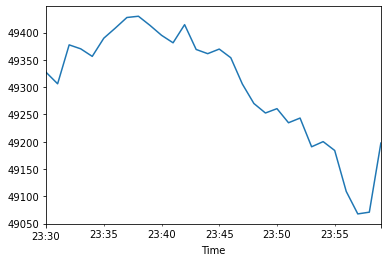

In [25]:
test.Open.plot()

In [26]:
"""  Buy if asset fell by more then 0.2% within the last 30 min (Calculate volatility in a minute for parameter)

     Sell if asset rises by more then 0.15% or falls further by 0.15% 
     (Break even point where you are exceeding the trading fees and actually making a profit)
 """

In [28]:
def strategytest(symbol, qty, entried=False):
    df = getminutedata(symbol, '1m', '30m')
    cumulret = (df.Open.pct_change() +1).cumprod() - 1
    if not entried:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol,
                                        side='BUY', type='MARKET',
                                        quantity=qty)
            print(order)
            entried=True
        else:
            print('No Trade has been executed')
    if entried:
        while True:
            df = getminutedata(symbol, '1m', '30m')
            sincebuy = df.loc[df.index > pd.to_datetime(
            order['transactTime'], unit='ms')]
            if len(sincebuy) > 0:
                sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
                if sincebuyret[-1] > 0.0015 or sincebuyret[-1] < -0.015:
                    order = client.create_order(symbol=symbol,
                                        side='SELL', type='MARKET',
                                        quantity=qty)
                    print(order)
                    break

SyntaxError: invalid syntax (<ipython-input-28-92fd80377424>, line 21)

In [ ]:
strategytest('BTCUSDT',0.00)